## Imports

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV


## Read data

In [243]:
df = pd.read_csv('input/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Compute pairwise correlation of columns

<Axes: >

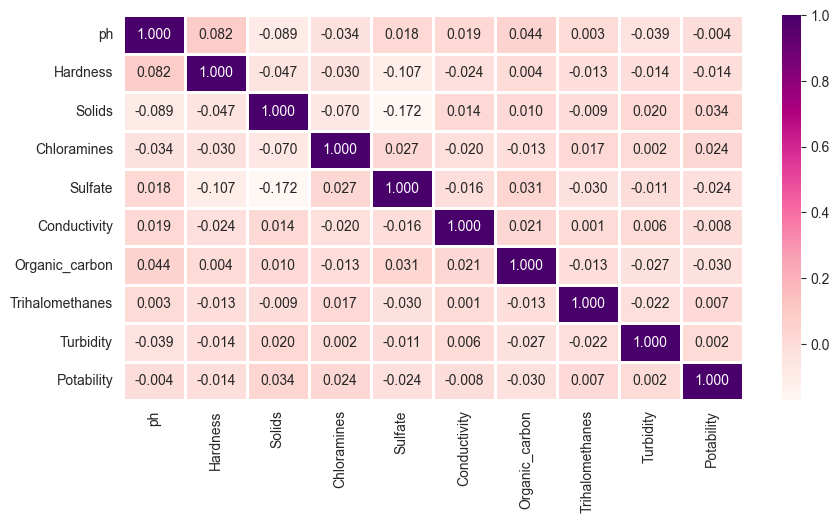

In [244]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="RdPu",fmt='.3f',linewidths=.8)

## Count of duplicated values

In [245]:
dup = df.duplicated().sum()
print('Any Duplicate Value:',dup)

Any Duplicate Value: 0


## Count of NaN values

In [246]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Filling NaN objects with mean

In [247]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

## Count of NaN values after filling

In [248]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [249]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Histogram of potability

<Axes: xlabel='Potability', ylabel='Count'>

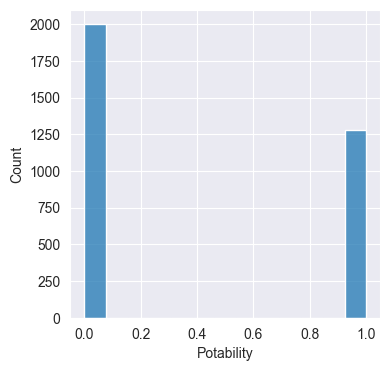

In [250]:
plt.rcParams['figure.figsize'] = [4,4]
sns.histplot(df['Potability'])

## Pairwise relationship in dataset

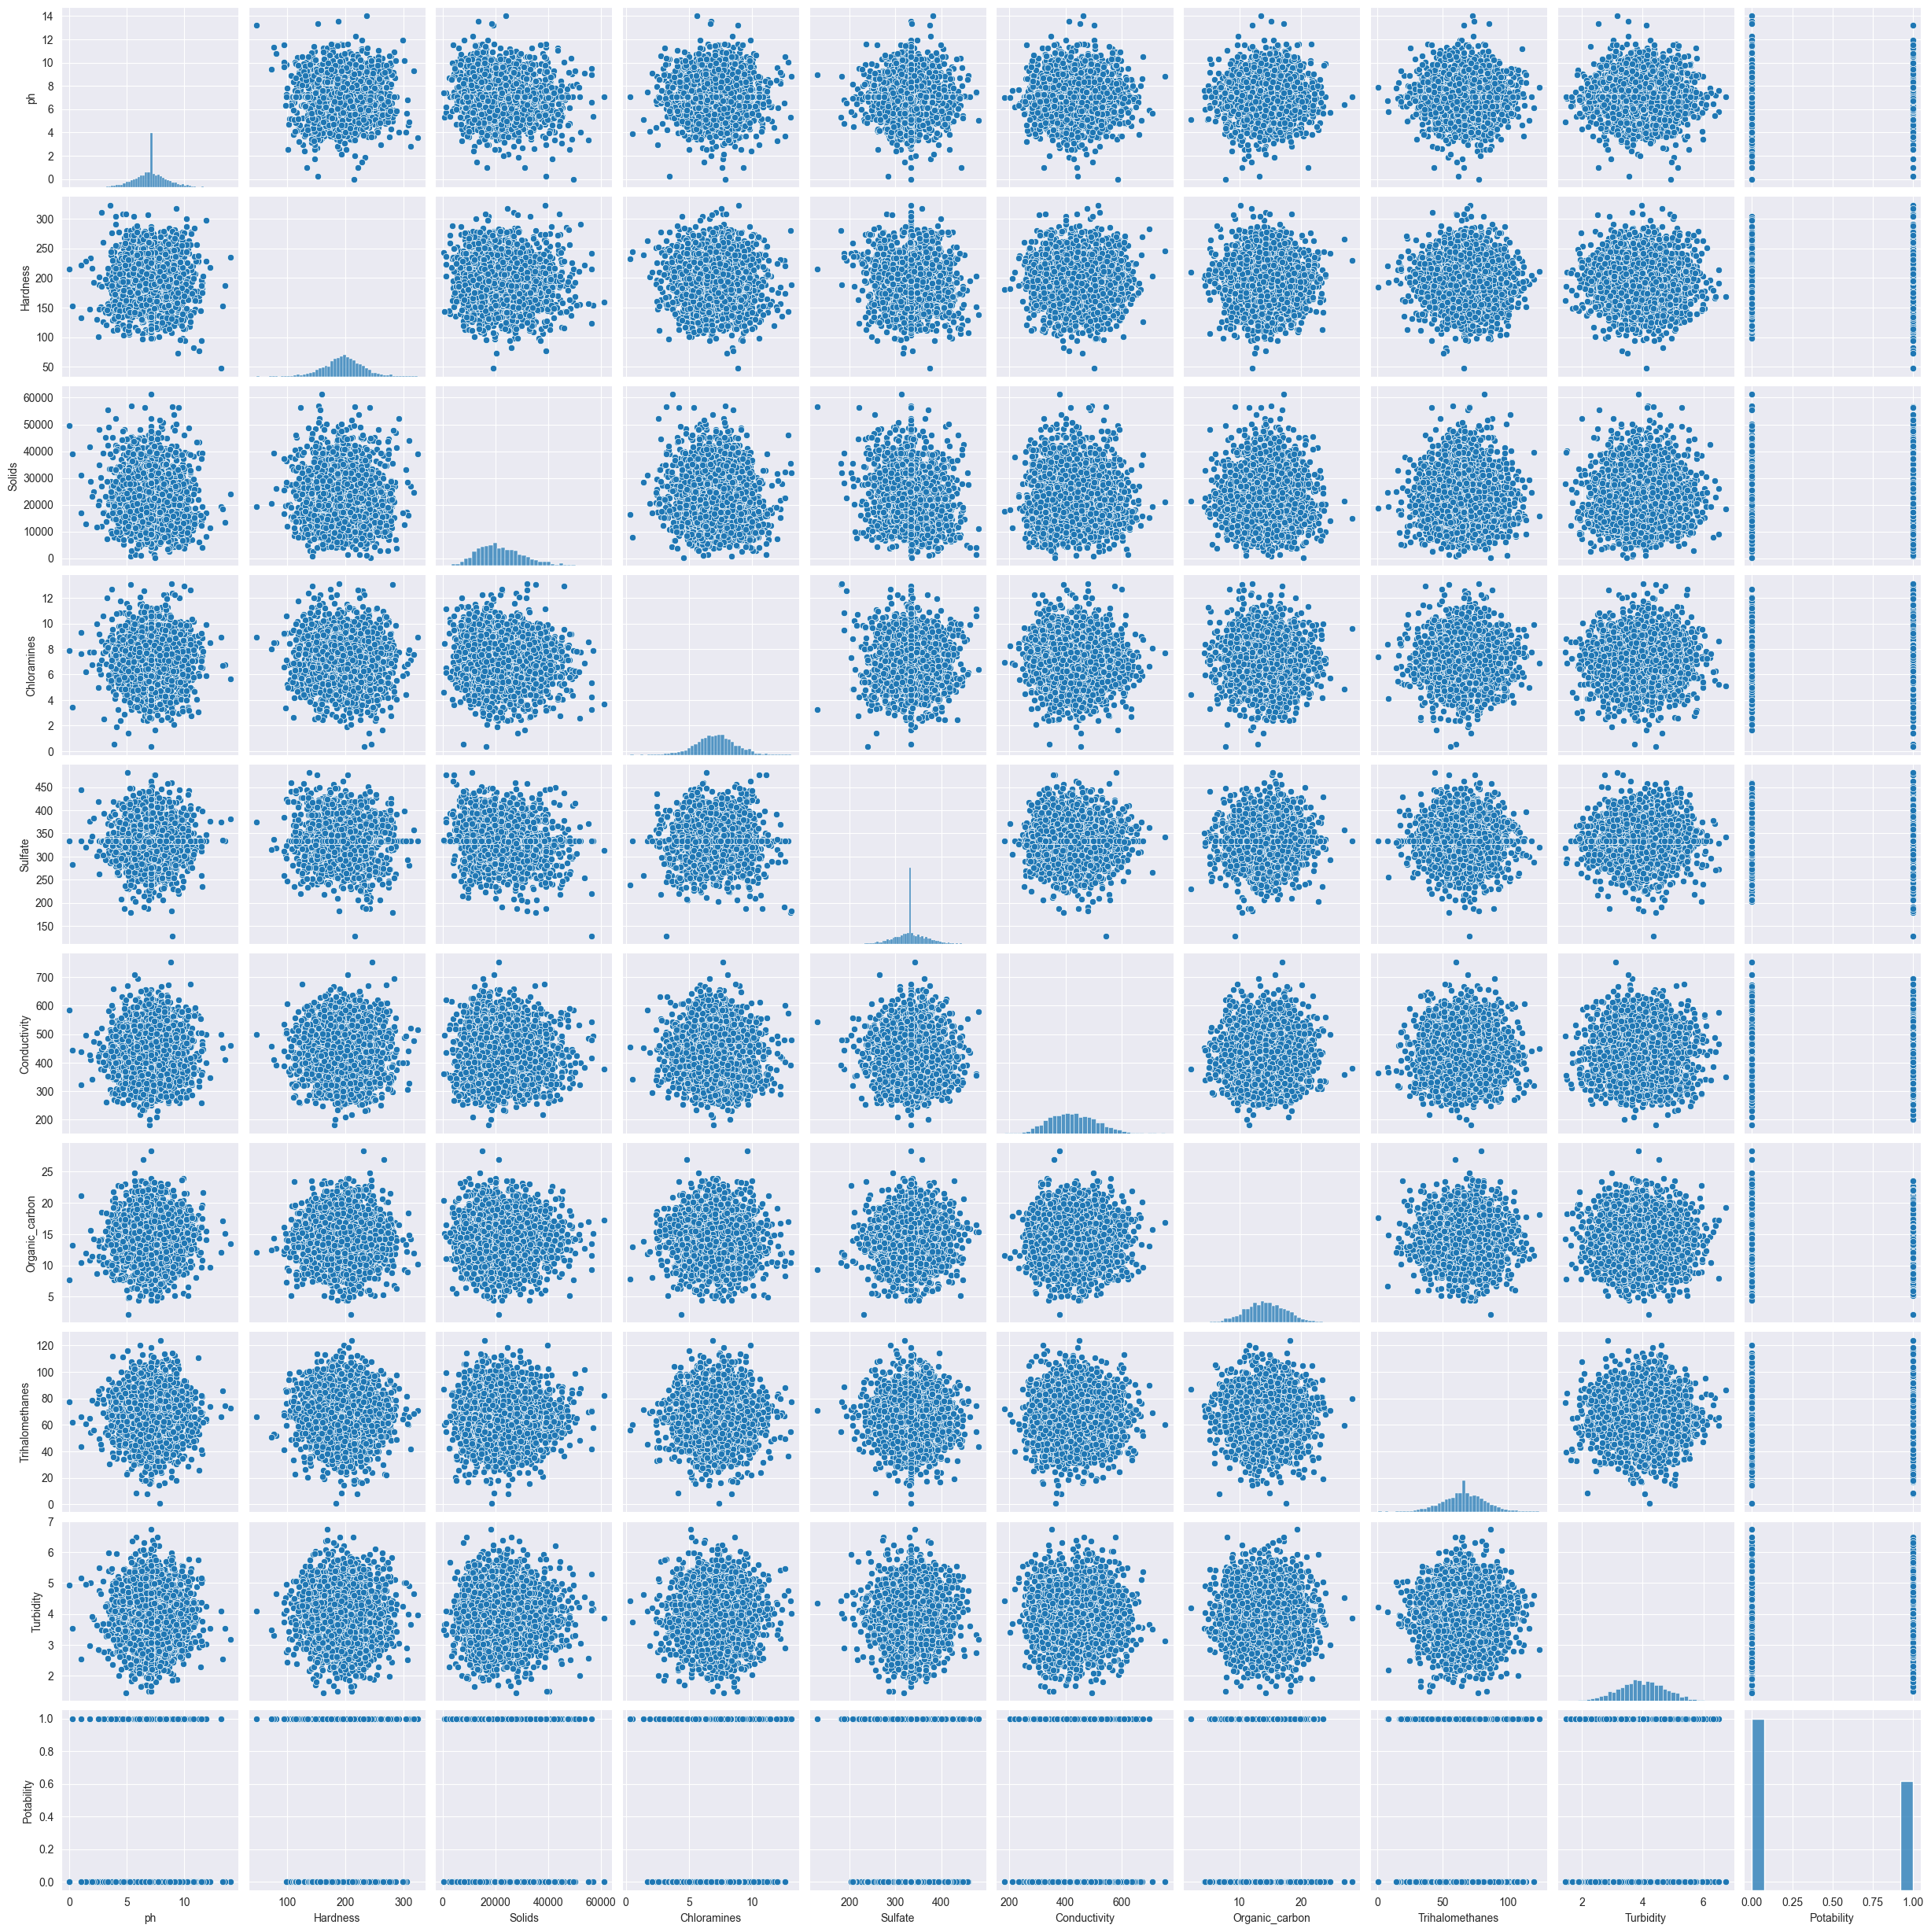

In [251]:
sns.pairplot(data = df)

## Split dataset into train and test data

In [252]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

x_train,x_test,y_train,y_test = tts(x,y,test_size=0.4, random_state = 7)


n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [253]:
print(x.describe())
print("\n\n")
print(y.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786  
std       80.824064        3.308162        15.769881     0.780382  
min      181.483754        2.200000         0.738000

## Random Forest Classifier

In [254]:
RFC = RandomForestClassifier()
# Build a forest of trees from the training set
RFC.fit(x_train,y_train)
# Predict classes
y_RFC = RFC.predict(x_test)




# rs = RandomizedSearchCV(RFC,
#                         param_dist,
#                         n_iter = 100,
#                         cv = 3,
#                         verbose = 1,
#                         n_jobs=-1,
#                         random_state=0)
# rs.fit(x_train, y_train)
# rs.best_params_

In [255]:
Acc_rfc = accuracy_score(y_test, y_RFC, normalize=False)
Acc_rfc_norm = accuracy_score(y_test, y_RFC)
print("Predicted:", Acc_rfc, "from", len(y_test))
print(f'Accuracy: {Acc_rfc_norm*100:.2f}%')

Predicted: 850 from 1311
Accuracy: 64.84%


In [256]:
print(classification_report(y_RFC,y_test))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1070
           1       0.29      0.65      0.41       241

    accuracy                           0.65      1311
   macro avg       0.59      0.65      0.58      1311
weighted avg       0.78      0.65      0.69      1311

